In [208]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/more-than-25k-magic-the-gathering-trading-cards/scryfall_mtg_cards_feb_2023.json


In [209]:
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cm
import seaborn as sns

# Introduction #
Welcome to a price factor analysis of Magic: the Gathering cards. In this series of experiments we're attempting to find an approach that correlates the price of Magic: the Gathering cards and their individual traits. Ideally, a pattern emerges that can be used to predict the prices of the cards. But before we jump into the data, first a little background.

# Background #
- What is Magic: the Gathering?
    
    Magic is a trading card game in whihc players build decks on their own and bring them to battle against once another. Magic is often considered the most complex trading card game today, being the first TCG to be proven turing complete [[read more here](http://arxiv.org/abs/1904.09828)]. The game has a strong following who crack packs and build decks regularly, contributing to the massive sales figures of the game's creator Wizards of the Coast who rakes in nearly $340 Million in Quarter 4 of 2022.
    
- Price Factors

    With as much money being spent on Magic as there is, different cards sell for different amounts on the secondary market. WotC sells packs of cards for anywhere from $4 to $100 based on contents, but commonly sells packs of 15 cards including only one rare or mythic rare for $4. Some cards are inherently more competitively viable than others, driving up their cost on the secondary market to high values. Some cards are much rarer than others, causing their costs to skyrocket. Most cards are completely unremarkable, often leading to abyssmal resale prices. With all of this, players have often looked for clear indicators of these price trends.
    
- Commonly accepted price factors
    
    The commmunity recognizes the competivie scene as the main driving factor for new cards being expensive, with older more rare cards having high prices due to scarcity. These experiments will attempt to find a common mechanical link between cards of similar prices to establish a solid "price factor" rather than using commonly shifting factors as the only basis for price

# THE NAIVE APPROACH #

Before we begin the analysis, the data needs to be introduced. All credit for data aggregation and compilation goes to Kaggle user Patrick Klein. The dataset used can be found here: https://www.kaggle.com/datasets/patkle/more-than-25k-magic-the-gathering-trading-cards

In [210]:
df = pd.read_json("/kaggle/input/more-than-25k-magic-the-gathering-trading-cards/scryfall_mtg_cards_feb_2023.json")
df

,object,id,oracle_id,multiverse_ids,mtgo_id,arena_id,tcgplayer_id,cardmarket_id,name,lang,...,all_parts,security_stamp,frame_effects,card_faces,loyalty,watermark,produced_mana,tcgplayer_etched_id,color_indicator,attraction_lights
0,card,aa1c6bcc-2d43-4ea9-a93f-019793616869,4489f362-9b7e-4dc0-a459-a990a487454e,[506925],87289.0,75351.0,229262.0,527580.0,Absorb Identity,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,709bcbca-7238-4c31-8d9e-ec0d54d0b298,8f3cba20-e7a4-47f4-8bce-90168ce9cc5c,[476092],79750.0,NaN,201569.0,421056.0,Accursed Horde,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,894556d8-6d5c-431b-a45d-26cd37c5f456,b1e6921e-e460-4e58-82b0-d98ee31c279d,[26715],17899.0,NaN,10531.0,1754.0,Accursed Centaur,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,e200b8f1-3738-4db4-a2b3-7aeb4c2fd59b,e1b6d0ab-4e11-43a2-8a7f-3fb51582ddf3,[],NaN,81072.0,NaN,NaN,A-Demilich,en,...,"[{'object': 'related_card', 'id': 'e200b8f1-37...",arena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,b3c950e2-a43b-47f8-9ad6-1909ccc7acbf,850eb3c3-029b-49b0-91a9-6daeb1b3a9e8,[443078],67845.0,67484.0,162126.0,319748.0,"Adeliz, the Cinder Wind",en,...,NaN,NaN,[legendary],NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25658,card,ed9b6a66-2ec4-44e6-b29b-f08768dca9cc,0ba3b1e0-1790-4247-93ab-72a43e8fb580,[205314],44650.0,NaN,37458.0,21570.0,Wizard Replica,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25659,card,49805401-9bd9-48a3-9b99-0120a8bb1fb5,a1fb1b77-a49f-4447-bbe0-156407f192e2,[8907],12185.0,NaN,7114.0,10319.0,Wizard Mentor,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25660,card,d1f629fb-b097-4240-8560-ef47f5678f48,36f68aa3-9955-46f1-bc87-497f16ef5222,[527368],91664.0,77186.0,243349.0,571519.0,Wizard Class,en,...,"[{'object': 'related_card', 'id': 'd1f629fb-b0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25661,card,71d13f19-482b-4a2e-9692-b7d7caf2f9f5,34edbf1b-0826-49f1-a04d-15cc8c543b22,[555332],98481.0,80282.0,268790.0,651845.0,Witty Roastmaster,en,...,NaN,NaN,NaN,NaN,NaN,cabaretti,NaN,NaN,NaN,NaN


This data is exceedingly comprehensive, but as a result we've got to do some heavy preprocessing. Elements such as `attraction_lights` are only present on cards with the attraction subtype, an approximate 40 out of the 25000+ cards.

As such, we're cutting down the data to the bare bones for the first tests.

In [211]:
essentials = ["name", "cmc", "mana_cost", "type_line", "power", "toughness", "loyalty", "colors", "keywords", "legalities", "rarity", "prices"]
df_slim = df.loc[:, essentials]
df_slim

,name,cmc,mana_cost,type_line,power,toughness,loyalty,colors,keywords,legalities,rarity,prices
0,Absorb Identity,2.0,{1}{U},Instant,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,"{'usd': '0.10', 'usd_foil': None, 'usd_etched'..."
1,Accursed Horde,4.0,{3}{B},Creature — Zombie,3,3,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,"{'usd': '0.17', 'usd_foil': None, 'usd_etched'..."
2,Accursed Centaur,1.0,{B},Creature — Zombie Centaur,2,2,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",common,"{'usd': '0.16', 'usd_foil': '0.54', 'usd_etche..."
3,A-Demilich,4.0,{U}{U}{U}{U},Creature — Skeleton Wizard,4,4,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",mythic,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
4,"Adeliz, the Cinder Wind",3.0,{1}{U}{R},Legendary Creature — Human Wizard,2,2,NaN,"[R, U]","[Flying, Haste]","{'standard': 'not_legal', 'future': 'not_legal...",uncommon,"{'usd': '0.17', 'usd_foil': '1.00', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...
25658,Wizard Replica,3.0,{3},Artifact Creature — Wizard,1,3,NaN,[],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",common,"{'usd': '0.20', 'usd_foil': None, 'usd_etched'..."
25659,Wizard Mentor,3.0,{2}{U},Creature — Human Wizard,2,2,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",common,"{'usd': '0.18', 'usd_foil': None, 'usd_etched'..."
25660,Wizard Class,1.0,{U},Enchantment — Class,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,"{'usd': '1.68', 'usd_foil': '2.38', 'usd_etche..."
25661,Witty Roastmaster,3.0,{2}{R},Creature — Devil Citizen,3,2,NaN,[R],[Alliance],"{'standard': 'legal', 'future': 'legal', 'hist...",common,"{'usd': '0.33', 'usd_foil': '1.78', 'usd_etche..."


This is still an obscene amount of data and we'll be doing some more pre-processing soon, but before that let's discuss why these features were considered essentials.

`name` - The easiest way to identify a card as card name defines if a card is considered the same. Even if all the other text on a card is the same, if they have a different name they are a different card. 

`cmc` and `mana_cost` - When playing, the cost of a card defines how early it can be played and therefore how powerful it is. If two cards are exactly the same except one has a mana cost of`{2}{U}` and one has a mana cost of `{1}{U}`, the second card is considered better as it is "cheaper" to play. The same is true if the first card costs `{U}{U}` and the second costs `{1}{U}` as the `{1}` represents one mana of any color rather than specifically a blue mana, making it "easier" to play. Both of these examples would likely affect the price. CMC refers to the total amount of mana, disregarding color. For example, a card costing `{U}{U}` and a card costing `{2}` both have a CMC of 2. CMC is often used when comparing cards quickly. [potentially explain further later] 

`type_line` - Types are very important in Magic and define how a card is used. Some decks want more of one type than another, and knowing these types will be essential for full understanding.

`power`,`toughness`, and `loyalty` - All cards with the type "Creature" have a power and toughness. Similar to mana cost, if two creatures are identical except power or toughness, the card with more power or toughness is considered better, theoretically affecting the price. In a similar fashion, all cards with the type "Planeswalker" have a loyalty that serves a simialr purpose to the combat stats. If a two planeswalkers are idenical except loyalty, the card with more loyalty is considered better, theoretically affecting the prices.

`colors` - The five colors of Magic all have different effects unique to their color, except when the designers decide to try something new. If an effect is rare for the color, it may affect pricing. Some colors are considered better than others too, so this may also affect the price.

`keywords` - Magic has been around long enough to use a common set of rules enough to warrant "keywording" as a way to save space in the text box. Some keywords are better than other, and rather than read 25000+ cards to find technical intricaies, we can use keywords to get a gist of how it may apply. In addition, similar to mana cost and power/toughness, if two cards are the same except one has a keyword the other doesnt, the card with the keyword is likely considered better, which would likely affect price.

`legalities` - Since Magic is so old, the power level of cards varies wildly. Some players enjoy the peak of power, while some feel liek it ruins the game. As such, different formats with different legalities have been created. It stands to reason that the popularity of a format would affect the prices of cards legal in those formats, so checking legality would allow for another reasonable aspect.

`rarity` - Magic, like other TCGs, has a rarity system to influence specific formats and the availability of cards. Rarity distribution has changed over the years, but it's currently expected that the "normal" rarity distribution is 10 commons, 3 uncommons, 1 rare or mythic, and 1 basic land. A mythic replaces the rare in approximately 1 in 8 packs. Scarcity is a well known factor of pricing, and this is the Magic equivalent.

`prices` - This dataset was compiled in February of 2023. It's common knowledge within the hobby that when new cards release, the prices of older cards can shift as strategies become more or less viable. In an effort to maintain as much accuracy as possible, the prices were taken at the time of compilation rather than at the time of writing, and these prices will be referenced when classifing prce ranges. For the sake of this paper, only the "usd" field will be referenced.

In [212]:
prices = [d.get('usd') for d in df_slim.prices]
df_slim["prices"] = prices
df_slim

,name,cmc,mana_cost,type_line,power,toughness,loyalty,colors,keywords,legalities,rarity,prices
0,Absorb Identity,2.0,{1}{U},Instant,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,0.10
1,Accursed Horde,4.0,{3}{B},Creature — Zombie,3,3,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,0.17
2,Accursed Centaur,1.0,{B},Creature — Zombie Centaur,2,2,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",common,0.16
3,A-Demilich,4.0,{U}{U}{U}{U},Creature — Skeleton Wizard,4,4,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",mythic,None
4,"Adeliz, the Cinder Wind",3.0,{1}{U}{R},Legendary Creature — Human Wizard,2,2,NaN,"[R, U]","[Flying, Haste]","{'standard': 'not_legal', 'future': 'not_legal...",uncommon,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...
25658,Wizard Replica,3.0,{3},Artifact Creature — Wizard,1,3,NaN,[],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",common,0.20
25659,Wizard Mentor,3.0,{2}{U},Creature — Human Wizard,2,2,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",common,0.18
25660,Wizard Class,1.0,{U},Enchantment — Class,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,1.68
25661,Witty Roastmaster,3.0,{2}{R},Creature — Devil Citizen,3,2,NaN,[R],[Alliance],"{'standard': 'legal', 'future': 'legal', 'hist...",common,0.33


As a note, there are other factors known to affect card prices. Features such as `reserved` and `promo` affect the prices of the card but are found on such a small subset that it's more efficient to drop them and the cards that fall into these categories for the time being.

In order to get an accurate model, we need to drop our null values from the target value, in this case `prices`. We're also dropping two specific outliers in the `cmc` and `mana_cost` categories, Mox Lotus and Gleemax. Both are joke cards that cost 100 and 1,000,000 mana respectively. For context, Third highest cmc among all cards is 16.

In [213]:
df_slim = df_slim.dropna(subset=['prices'])
df_slim = df_slim[df_slim["name"].str.contains("Gleemax") == False]
df_slim = df_slim[df_slim["name"].str.contains("Mox Lotus") == False]
df_slim

,name,cmc,mana_cost,type_line,power,toughness,loyalty,colors,keywords,legalities,rarity,prices
0,Absorb Identity,2.0,{1}{U},Instant,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,0.10
1,Accursed Horde,4.0,{3}{B},Creature — Zombie,3,3,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,0.17
2,Accursed Centaur,1.0,{B},Creature — Zombie Centaur,2,2,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",common,0.16
4,"Adeliz, the Cinder Wind",3.0,{1}{U}{R},Legendary Creature — Human Wizard,2,2,NaN,"[R, U]","[Flying, Haste]","{'standard': 'not_legal', 'future': 'not_legal...",uncommon,0.17
5,Aerial Guide,3.0,{2}{U},Creature — Drake,2,2,NaN,[U],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",common,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
25658,Wizard Replica,3.0,{3},Artifact Creature — Wizard,1,3,NaN,[],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",common,0.20
25659,Wizard Mentor,3.0,{2}{U},Creature — Human Wizard,2,2,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",common,0.18
25660,Wizard Class,1.0,{U},Enchantment — Class,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,1.68
25661,Witty Roastmaster,3.0,{2}{R},Creature — Devil Citizen,3,2,NaN,[R],[Alliance],"{'standard': 'legal', 'future': 'legal', 'hist...",common,0.33


This removed over a thousand cards. These cards are either hyper-rare promos selling so rarely that they didn't have a market price or they were errors when compiling the data. Either way, they're gone now, so now we can begin some rudamentary analysis.

In [214]:
tocat = ["mana_cost", "rarity"]
df_slim_cat = df_slim
for w in tocat:
    df_slim_cat[w] = df_slim.loc[:, w].astype("category").cat.codes
df_slim_cat

,name,cmc,mana_cost,type_line,power,toughness,loyalty,colors,keywords,legalities,rarity,prices
0,Absorb Identity,2.0,101,Instant,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",4,0.10
1,Accursed Horde,4.0,284,Creature — Zombie,3,3,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",4,0.17
2,Accursed Centaur,1.0,595,Creature — Zombie Centaur,2,2,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",0,0.16
4,"Adeliz, the Cinder Wind",3.0,109,Legendary Creature — Human Wizard,2,2,NaN,"[R, U]","[Flying, Haste]","{'standard': 'not_legal', 'future': 'not_legal...",4,0.17
5,Aerial Guide,3.0,234,Creature — Drake,2,2,NaN,[U],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
25658,Wizard Replica,3.0,278,Artifact Creature — Wizard,1,3,NaN,[],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",0,0.20
25659,Wizard Mentor,3.0,234,Creature — Human Wizard,2,2,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",0,0.18
25660,Wizard Class,1.0,712,Enchantment — Class,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",4,1.68
25661,Witty Roastmaster,3.0,207,Creature — Devil Citizen,3,2,NaN,[R],[Alliance],"{'standard': 'legal', 'future': 'legal', 'hist...",0,0.33


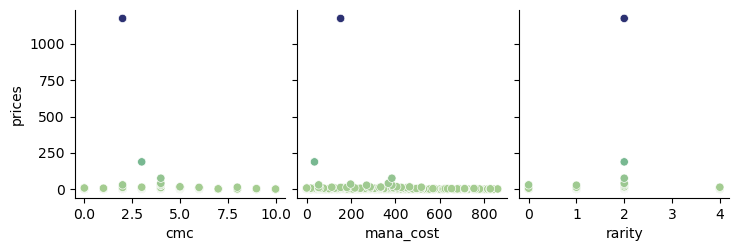

In [215]:
df_slim_cat_plot = df_slim_cat.loc[:, ["cmc", "mana_cost", "rarity", "prices"]].sample(n=1000)
df_slim_cat_plot = df_slim_cat_plot.assign(prices=df_slim_cat_plot['prices'].astype(float))
df_slim_cat_plot = df_slim_cat_plot.sort_values(by='prices', inplace=False)
ax = sns.pairplot(df_slim_cat_plot, y_vars="prices", hue='prices', palette="crest")
ax._legend.remove()
ax

Hmm. It seems like there isn't much correlation with these values and that we have some severe high-end skew. Our prices might be a bit too wide to accurately predict with values this loose, so let's turn this into a classification problem.

# CLASSIFIER APPROACH #

To start, we're going to define our categories using some common Magic slang.

**Category 1: BULK** (0.01 - 0.24 USD) - These cards are next to worthless and often find homes in shoeboxes buried deep in the closet.

**Category 2: CHAFF** (0.25 - 0.99 USD) - While chaff and bulk can be snonymous, we're using chaff here to represent the cards that people will spend a little bit to get, but not more than a dollar.

**Category 3: FILLER** (1.00 - 3.99 USD) - Magic is a trading card game, so unsurprisingly people trade the cards. People wil make a binder to showcase their collection avalaible to trade, and if it looks a bit thin they'll often fill it with cards almost worht the price of a pack.

**Category 4: CHASE** (4.00 - 14.99 USD) - The price of a standard pack is 3.99 USD, so (ignoring taxes) anything in this category and on is considered profit. This makes these cards worth chasing when opening packs, hence the name.

**Category 5: LOTTERY** (15.00+ USD) - The average set is over 200 cards, and often only one or two cards cross this threshhold. These are the equivalent of winning a lottery ticket as the prices nearly quadrupe the price of a pack on the low end.

Now that we've defined our categories, let's update the DataFrame to reflect them.

In [216]:
df_slim['prices'] = df_slim['prices'].astype(float)

categories = []

for index, row in df_slim.iterrows():
    if row["prices"] < 0.25:
        categories.append("1")
    elif row["prices"] < 1:
        categories.append("2")
    elif row["prices"] < 4:
        categories.append("3")   
    elif row["prices"] < 15:
        categories.append("4")
    else:
        categories.append("5")

        
df_slim['category'] = categories        
df_slim        

,name,cmc,mana_cost,type_line,power,toughness,loyalty,colors,keywords,legalities,rarity,prices,category
0,Absorb Identity,2.0,101,Instant,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",4,0.10,1
1,Accursed Horde,4.0,284,Creature — Zombie,3,3,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",4,0.17,1
2,Accursed Centaur,1.0,595,Creature — Zombie Centaur,2,2,NaN,[B],[],"{'standard': 'not_legal', 'future': 'not_legal...",0,0.16,1
4,"Adeliz, the Cinder Wind",3.0,109,Legendary Creature — Human Wizard,2,2,NaN,"[R, U]","[Flying, Haste]","{'standard': 'not_legal', 'future': 'not_legal...",4,0.17,1
5,Aerial Guide,3.0,234,Creature — Drake,2,2,NaN,[U],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",0,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25658,Wizard Replica,3.0,278,Artifact Creature — Wizard,1,3,NaN,[],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",0,0.20,1
25659,Wizard Mentor,3.0,234,Creature — Human Wizard,2,2,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",0,0.18,1
25660,Wizard Class,1.0,712,Enchantment — Class,NaN,NaN,NaN,[U],[],"{'standard': 'not_legal', 'future': 'not_legal...",4,1.68,3
25661,Witty Roastmaster,3.0,207,Creature — Devil Citizen,3,2,NaN,[R],[Alliance],"{'standard': 'legal', 'future': 'legal', 'hist...",0,0.33,2


We have our 5 categories now, let's train a KNN model.

We're using a KNN model here because of the push and pull between category. It'll be a bit harder to visualize because of the number of dimensions, but I expect the model to be decent.

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts

names = ["cmc", "mana_cost", "rarity"]
X_train, X_test, t_train, t_test = tts(df_slim.loc[:, names], df_slim.loc[:, 'category'], test_size=0.05)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, t_train)
y_test = knn.predict(X_test)
acc = knn.score(X_test, t_test)
acc

0.660234899328859

The accuracy here doesn't look terrible. Let's try to visualize some points.

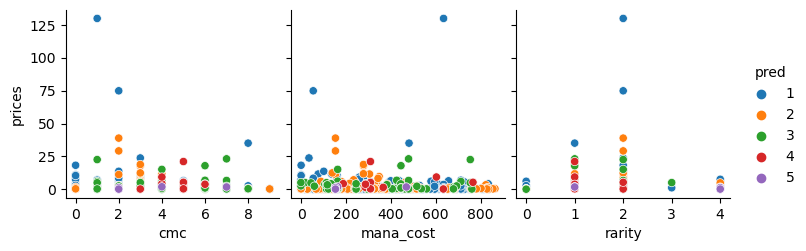

In [218]:
df_clf_plot = X_test
df_clf_plot['pred'] = y_test
df_clf_plot['prices'] = df_slim['prices']
df_clf_plot = df_clf_plot.sort_values("pred")
ax = sns.pairplot(df_clf_plot, x_vars=["cmc", "mana_cost", "rarity"], y_vars="prices", hue='pred')
ax

Well that's less than ideal. We can see some decent predictions but the model really struggles with these large outliers. Let's drop any card over $50 and mark them up as anomalies just to see if the model improves.

In [219]:
df_clf_low = df_slim[df_slim.prices <= 50]

X_train, X_test, t_train, t_test = tts(df_clf_low.loc[:, names], df_clf_low.loc[:, 'category'], test_size=0.05)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, t_train)
y_test = knn.predict(X_test)
acc = knn.score(X_test, t_test)
acc

0.6632996632996633

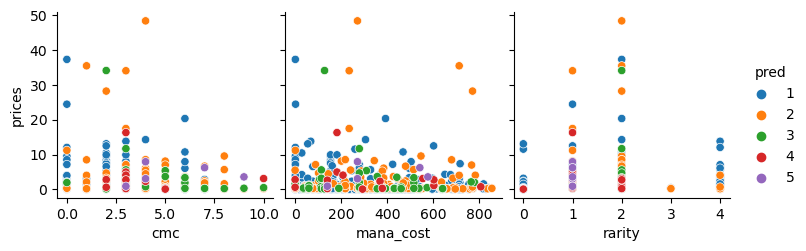

In [220]:
df_clf_plot = X_test
df_clf_plot['pred'] = y_test
df_clf_plot['prices'] = df_slim['prices']
df_clf_plot = df_clf_plot.sort_values("pred")
ax = sns.pairplot(df_clf_plot, x_vars=["cmc", "mana_cost", "rarity"], y_vars="prices", hue='pred')
ax

Looks like clusters didn't properly form, but some were correctly distributed. Let's look at the full pairplot and the correct labels.

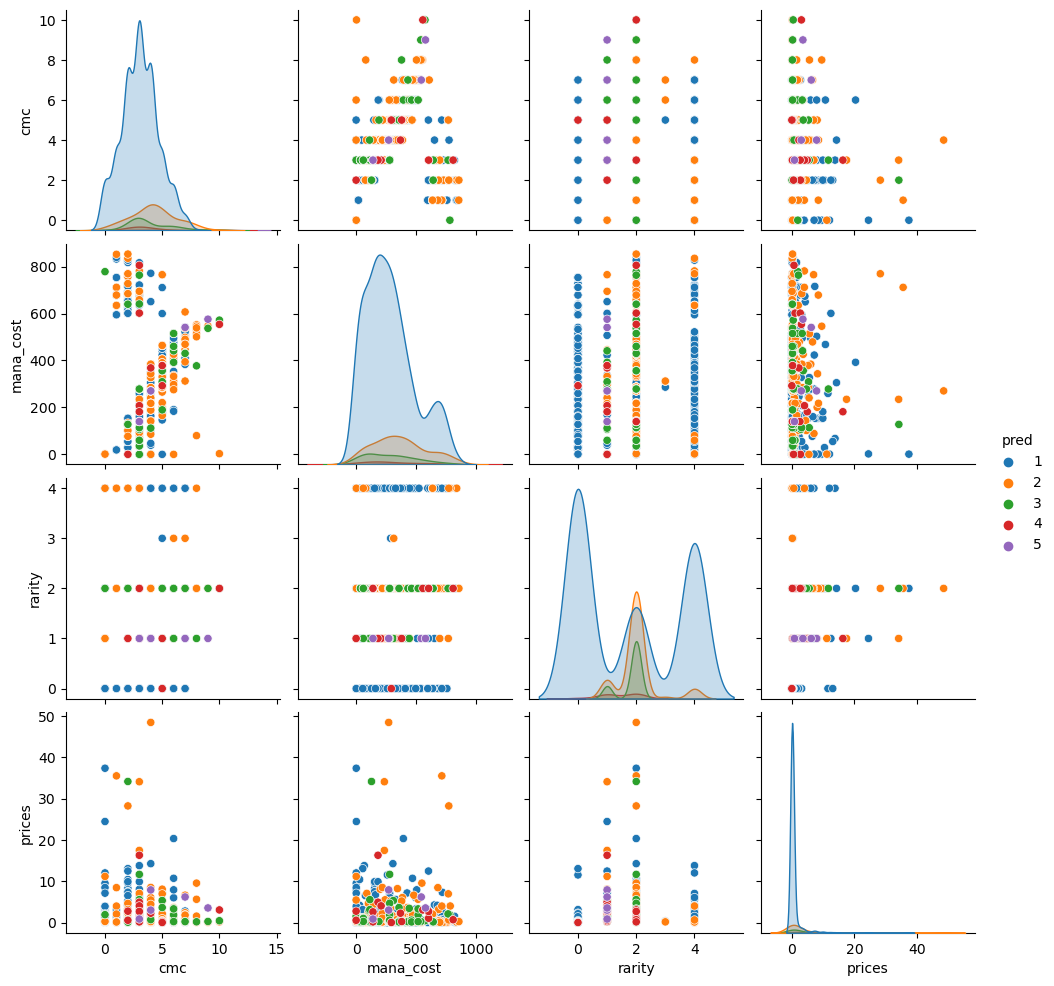

In [221]:
sns.pairplot(df_clf_plot, hue='pred')

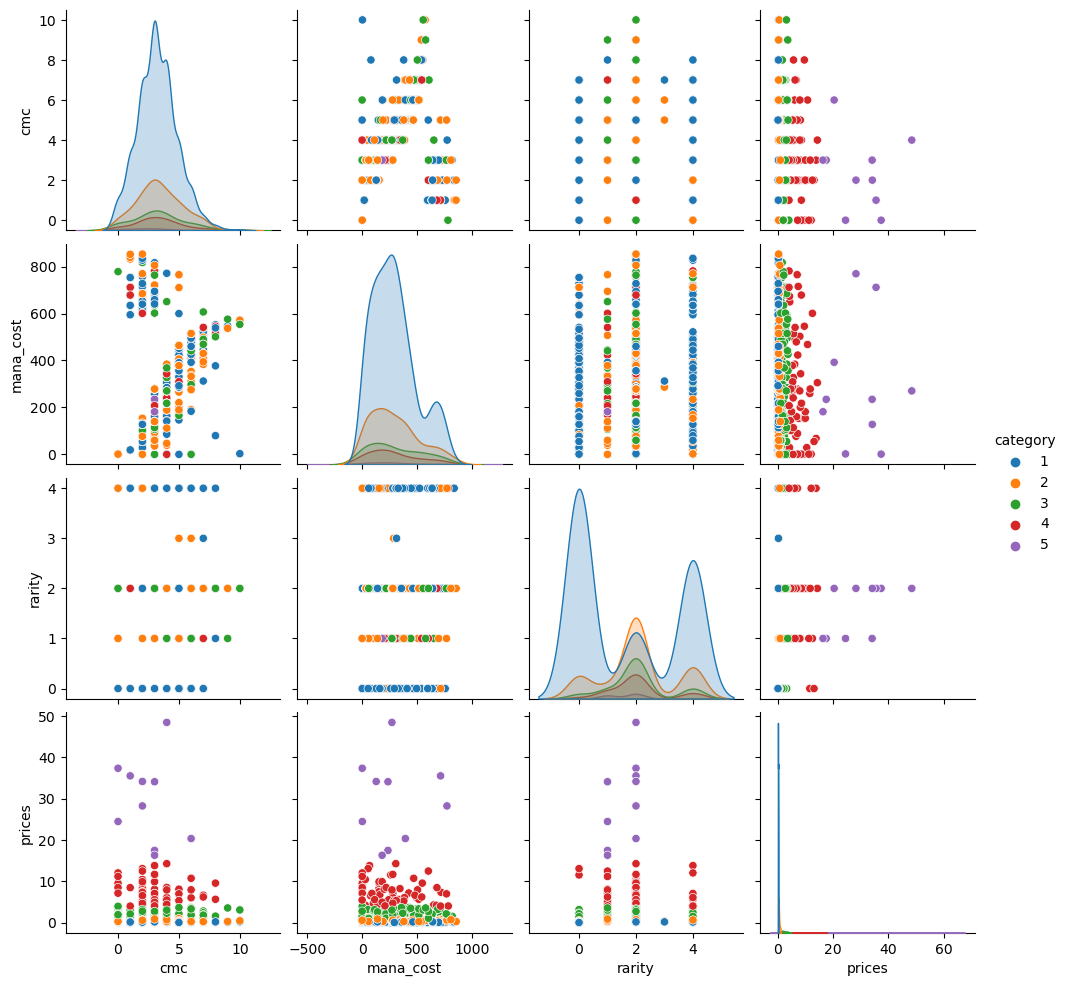

In [222]:
df_clf_plot['category'] = df_slim['category']
sns.pairplot(df_clf_plot, x_vars=["cmc", "mana_cost", "rarity", "prices"], y_vars=["cmc", "mana_cost", "rarity", "prices"], hue='category')

As we can see, the clusters don't look like the categories. Some labels were accurately predicted but many weren't. Let's do an accuracy analysis of some other classification models before we draw our conclusion. After all, if a standout is found, it may change our findings significantly.

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf_names = ["K Nearest Neighbors", "Decision Trees", "Random Forest", "Naive Bayes"]
clfs = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=10), RandomForestClassifier(max_depth=10, max_features="sqrt"), GaussianNB()]

names = ["cmc", "mana_cost", "rarity"]
X_train, X_test, t_train, t_test = tts(df_slim.loc[:, names], df_slim.loc[:, 'category'], test_size=0.05)

i=0
for clf in clfs:
    print(clf_names[i])
    clf.fit(X_train, t_train)
    acc = clf.score(X_test, t_test)
    print(acc)
    print("-"*50)
    i+=1

K Nearest Neighbors
0.6459731543624161
--------------------------------------------------
Decision Trees
0.6476510067114094
--------------------------------------------------
Random Forest
0.6593959731543624
--------------------------------------------------
Naive Bayes
0.6451342281879194
--------------------------------------------------


Seems to be that the accuracies of each model are approximately equal. This implies that no model can sufficently predict these values accurately. So what went wrong here?

# ANALYSIS & CONCLUSIONS #

It seems the problem posed was too broad in scope. Price analysis goes far beyond what's printed on the cards. The categorical data even capable of being used was not accurate enough, lending to the idea that the true price factors are conglomerations of rules text and flavor-of-the-month tournament winning decks. It stands to reason that a deck winning a lot of tournaments will se the cards it uses increase in price, and it also stands to reason that cards can't be predicted for decks solely on one or two factors, therefore the prices can't be predicted bases on these factors. 

With the analysis here we do get some sweeping statements such as the average mythic rare is more expensive than the average common, but a simple understanding of scarcity in the market could tell you the same thing.

It's not all bad though, as failing is still a form of learning. From these experiments we can learn that price analysis needs to be taken on a much more individual basis, evaluating cards on case-by-case merits and shortcomings. 

Thanks for reading, I hope you enjoyed.